<a href="https://colab.research.google.com/github/ElvesJohn/MachineLearningCW/blob/main/MachineLearningColab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##MS4S16 Applied Machine Learning Coursework
by 30062549

##Setups and Data Reader

In [94]:
pip install fairlearn 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.manifold import TSNE
import numpy as np
import lightgbm as lgb
from sklearn.metrics import roc_auc_score
import os
import fairlearn
from fairlearn.metrics import MetricFrame
import warnings
warnings.filterwarnings("ignore")
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ML_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [96]:
data = pd.read_csv('/content/MS4S16_Dataset.csv')

##Explorative Data Analysis

Take a look at the data structure

In [97]:
data.head()

,Diagnosis,Anhedonia,Apathy,Appetite,Concentration,Content,Delay,Delusion,Dep_Mood,Focus,...,Race,Rumination,Sex,Sleep,Stress,Suspicious,Tension,Tired,Unusual_Thought,Withdrawal
0,1,4.501446,3.056575,9.283891,8.305502,0.006142,Yes,1.170842,8.177884,8.305502,...,White,5.041432,Female,6.552082,5.915492,3.991749,6.371877,4.537270,3.744410,5.242819
1,0,5.432608,0.307721,25.809400,5.060206,0.062209,Yes,2.272548,11.162913,5.060206,...,White,4.656790,Male,5.558434,4.008265,NaN,2.238665,6.113746,0.720458,3.797242
2,0,6.557500,-1.412208,24.842012,6.504229,0.071532,No,1.439095,5.887363,6.504229,...,Black,7.290494,Female,5.787561,7.177926,NaN,6.992499,5.557374,-0.491255,4.421288
3,0,5.429568,1.686157,24.175853,6.994948,0.278345,No,1.380185,8.943851,6.994948,...,White,6.759339,Female,6.787287,2.866815,NaN,4.018286,6.136269,0.765388,2.299562
4,1,5.099846,-0.612506,45.808490,5.869212,0.004214,Yes,1.237976,6.741627,5.869212,...,Black,6.190019,Male,7.748312,6.798220,5.103103,5.063542,4.213723,0.705895,6.547707


In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Diagnosis           5000 non-null   int64  
 1   Anhedonia           5000 non-null   float64
 2   Apathy              5000 non-null   float64
 3   Appetite            5000 non-null   float64
 4   Concentration       5000 non-null   float64
 5   Content             5000 non-null   float64
 6   Delay               5000 non-null   object 
 7   Delusion            5000 non-null   float64
 8   Dep_Mood            5000 non-null   float64
 9   Focus               5000 non-null   float64
 10  Hallucination       5000 non-null   float64
 11  Housing             5000 non-null   object 
 12  Intrusive_Thoughts  4170 non-null   float64
 13  Participant         5000 non-null   int64  
 14  Passive             5000 non-null   float64
 15  Pregnant            2762 non-null   float64
 16  Psycho

In [99]:
data['Sex'].value_counts()

Female    2762
Male      2238
Name: Sex, dtype: int64

In [100]:
data['Delay'].value_counts()

Yes    2571
No     2429
Name: Delay, dtype: int64

In [101]:
data['Housing'].value_counts()

Stable      4674
Unstable     326
Name: Housing, dtype: int64

In [102]:
data['Race'].value_counts()

White       1838
Black       1741
Hispanic     715
Asian        706
Name: Race, dtype: int64

In [103]:
data['Diagnosis'].value_counts()

1    2529
0    2471
Name: Diagnosis, dtype: int64

**The dataset is not imbalanced. **

In [104]:
data.describe()

,Diagnosis,Anhedonia,Apathy,Appetite,Concentration,Content,Delusion,Dep_Mood,Focus,Hallucination,...,Pregnant,Psychomotor,Rumination,Sleep,Stress,Suspicious,Tension,Tired,Unusual_Thought,Withdrawal
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,2762.000000,5000.000000,5000.000000,5000.000000,5000.000000,2127.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.505800,6.502860,2.478849,27.070029,6.519924,0.279407,2.637389,5.727062,6.519924,65.073832,...,0.101376,4.680583,5.685816,7.011266,4.916418,2.754909,4.920667,inf,2.480266,3.958121
std,0.500016,1.488151,1.730810,14.202618,1.474846,0.834494,1.440347,3.284501,1.474846,223.943469,...,0.301880,1.482692,2.161891,1.410841,2.220262,1.496126,1.962342,NaN,1.410475,1.469444
min,0.000000,1.098854,-3.211011,0.141074,1.299964,0.000187,-2.127037,0.000000,1.299964,0.027350,...,0.000000,-0.024974,-0.409032,2.144726,-3.257788,-2.346238,-2.183456,0.366650,-1.981307,-0.825919
25%,0.000000,5.495361,1.265128,16.724108,5.528181,0.018655,1.629919,4.678095,5.528181,4.113962,...,0.000000,3.697870,4.042552,6.058402,3.443683,1.703462,3.565482,4.491580,1.486439,2.969534
50%,1.000000,6.485527,2.427409,25.165292,6.498042,0.064259,2.558146,6.752196,6.498042,12.764604,...,0.000000,4.720156,5.521805,6.980519,5.096416,2.735108,5.247353,5.513508,2.388994,3.962131
75%,1.000000,7.489218,3.642059,35.447666,7.519759,0.215773,3.588012,8.045706,7.519759,41.814204,...,0.000000,5.682627,7.276673,7.977138,6.531673,3.725759,6.385145,6.569176,3.426667,4.972302
max,1.000000,11.603140,8.803433,113.438734,11.649649,21.001327,8.978785,12.003550,11.649649,6287.163151,...,1.000000,10.171540,12.009666,11.920312,11.970952,8.212275,9.622076,inf,8.066822,9.022207


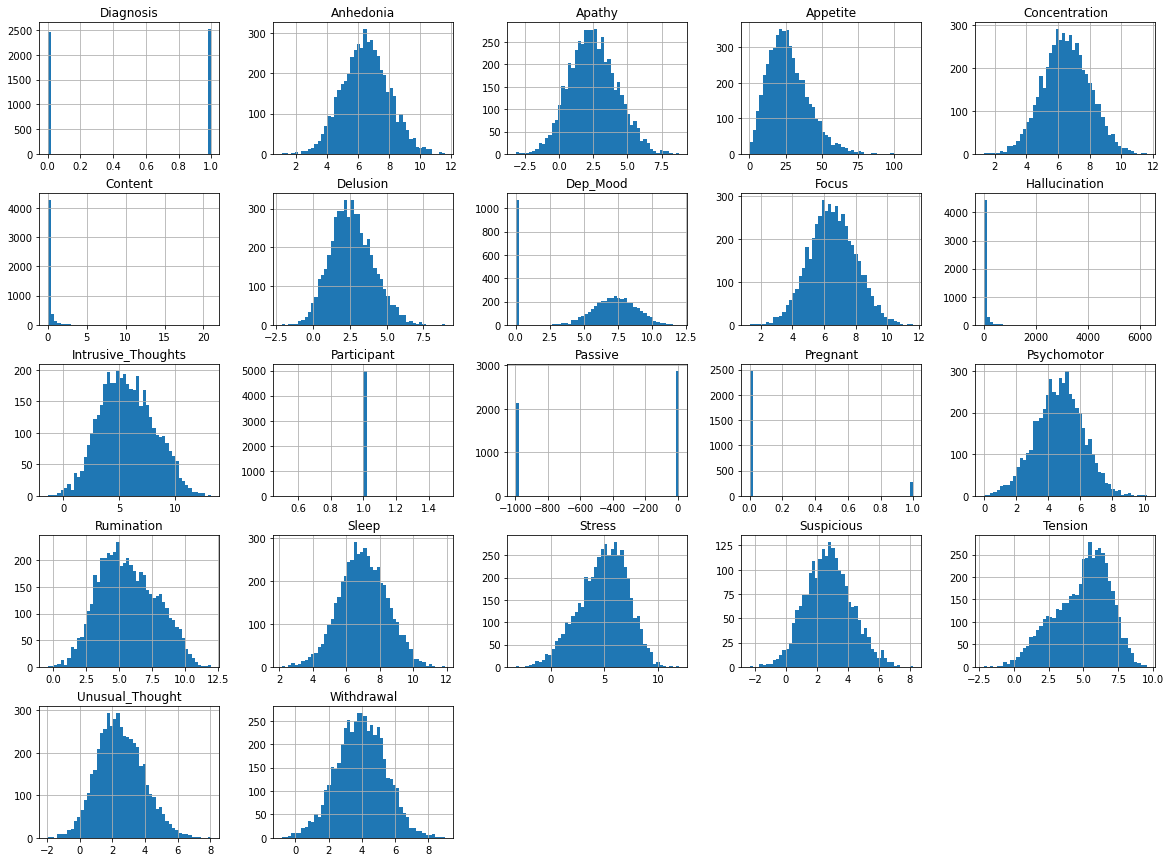

In [105]:
%matplotlib inline
data.drop('Tired', axis=1, inplace=False).hist(bins=50, figsize=(20,15))
plt.show()

In [106]:
# Compute the correlation matrix
corr = data.drop(['Tired','Diagnosis','Sex','Race','Housing','Delay','Participant'], axis=1, inplace=False).corr()

# Plot the heatmap
corr.style.background_gradient()

,Anhedonia,Apathy,Appetite,Concentration,Content,Delusion,Dep_Mood,Focus,Hallucination,Intrusive_Thoughts,Passive,Pregnant,Psychomotor,Rumination,Sleep,Stress,Suspicious,Tension,Unusual_Thought,Withdrawal
Anhedonia,1.000000,-0.087146,0.028458,-0.103457,0.047178,-0.137018,-0.001519,-0.103457,-0.053082,0.195297,0.010750,-0.032762,0.060917,0.202069,-0.014005,-0.141027,-0.089604,-0.162854,-0.119673,-0.075209
Apathy,-0.087146,1.000000,0.002106,0.107747,-0.064405,0.145132,-0.031882,0.107747,0.026718,-0.182515,-0.003923,0.018414,-0.071669,-0.193687,0.008407,0.157259,0.114802,0.178003,0.812859,0.093710
Appetite,0.028458,0.002106,1.000000,-0.015122,-0.028787,-0.009600,-0.007046,-0.015122,-0.002647,0.023354,0.004908,-0.010042,-0.023503,0.020573,0.016495,0.006104,0.005787,0.011619,-0.001190,0.005644
Concentration,-0.103457,0.107747,-0.015122,1.000000,-0.038601,0.115106,-0.043574,1.000000,0.038687,-0.167951,-0.006648,0.012683,-0.071971,-0.190818,-0.030384,0.181396,0.101632,0.184090,0.127945,0.072692
Content,0.047178,-0.064405,-0.028787,-0.038601,1.000000,-0.062656,0.030003,-0.038601,-0.031946,0.072818,-0.012404,0.034771,0.002365,0.074279,-0.014943,-0.060263,-0.395027,-0.075790,-0.073211,-0.054486
Delusion,-0.137018,0.145132,-0.009600,0.115106,-0.062656,1.000000,-0.045544,0.115106,0.446102,-0.232700,-0.012481,0.002120,-0.101670,-0.246398,0.019044,0.185466,0.144114,0.215114,0.172897,0.108807
Dep_Mood,-0.001519,-0.031882,-0.007046,-0.043574,0.030003,-0.045544,1.000000,-0.043574,-0.011256,0.022233,-0.404670,0.007187,0.018221,0.011648,0.011746,-0.058349,-0.090865,-0.064671,-0.038897,-0.042382
Focus,-0.103457,0.107747,-0.015122,1.000000,-0.038601,0.115106,-0.043574,1.000000,0.038687,-0.167951,-0.006648,0.012683,-0.071971,-0.190818,-0.030384,0.181396,0.101632,0.184090,0.127945,0.072692
Hallucination,-0.053082,0.026718,-0.002647,0.038687,-0.031946,0.446102,-0.011256,0.038687,1.000000,-0.099086,0.007514,-0.020834,-0.061639,-0.110613,0.015907,0.095685,0.076141,0.110464,0.048999,0.028669
Intrusive_Thoughts,0.195297,-0.182515,0.023354,-0.167951,0.072818,-0.232700,0.022233,-0.167951,-0.099086,1.000000,0.020195,-0.036063,0.160036,0.907793,-0.010683,-0.105531,-0.214653,-0.123461,-0.221437,-0.080340


**Conclusion**:
- Variable 'Participant' is constant, has no predicting power, thus will be removed. 
- Variable 'Tired' has 'NaN' and 'inf' values.
- Variables 'Intrusive_Thoughts' and 'Pregnant' have significant number of null values.
- Variales 'Passive' and 'Hallucination' have big value ranges, significantly bigger than other variables, thus we need to standardize them. 
- Target variable 'Diagnosis' is not imbalanced.
- There are multicollinearity between variables. 

#Create Training and Test Datasets and Data Processing 

In [107]:
#split the training and testing datasets
train_set, test_set = train_test_split(data, test_size=0.3, random_state=42)

Below is the function for data processing

In [108]:
num_var = [
 'Anhedonia',
 'Apathy',
 'Appetite',
 'Concentration',
 'Content',
 'Delusion',
 'Dep_Mood',
 'Focus',
 'Hallucination',
 'Intrusive_Thoughts',
 'Passive',
 'Psychomotor',
 'Rumination',
 'Sleep',
 'Stress',
 'Suspicious',
 'Tension',
 'Tired',
 'Unusual_Thought',
 'Withdrawal']

categories = ['Sex','Race','Housing','Delay'] 

def data_remove(data):
    data['Pregnant'].fillna(0, inplace=True)
    data.fillna(data.mean(), inplace=True)
    # clipper method for 'Tired' column. 
    data = data.replace([np.inf, -np.inf], np.nan)
    data['Tired'] = data['Tired'].replace(np.nan, data['Tired'].max())
    # Create a copy of the dataframe, and remove 'Participant'
    data_standardized = data.drop('Participant', axis= 1).copy()
    # Initialize the StandardScaler
    scaler = StandardScaler()
    # Fit and transform the selected columns
    data_standardized[num_var] = scaler.fit_transform(data_standardized[num_var])
    return data_standardized

In [109]:
train_processed = data_remove(train_set)

In [110]:
train_processed.describe()

,Diagnosis,Anhedonia,Apathy,Appetite,Concentration,Content,Delusion,Dep_Mood,Focus,Hallucination,...,Pregnant,Psychomotor,Rumination,Sleep,Stress,Suspicious,Tension,Tired,Unusual_Thought,Withdrawal
count,3500.000000,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,...,3500.000000,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03,3.500000e+03
mean,0.509143,-2.233134e-17,-1.319579e-16,2.740665e-17,3.958738e-16,2.233134e-17,-1.725604e-16,-7.460699e-17,3.958738e-16,1.725604e-17,...,0.057429,-3.994265e-16,2.537653e-16,-9.643080e-17,2.294038e-16,1.756056e-16,-2.552879e-16,5.278317e-17,4.618528e-16,-1.481989e-16
std,0.499988,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,...,0.232693,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00,1.000143e+00
min,0.000000,-3.654868e+00,-3.314213e+00,-1.884883e+00,-3.373871e+00,-3.279762e-01,-3.305412e+00,-1.714357e+00,-3.373871e+00,-2.926019e-01,...,0.000000,-3.196337e+00,-2.810780e+00,-3.398210e+00,-3.691577e+00,-5.232394e+00,-3.652975e+00,-3.178789e+00,-3.190353e+00,-3.049202e+00
25%,0.000000,-6.721595e-01,-6.984433e-01,-7.259440e-01,-6.753702e-01,-3.059933e-01,-6.942597e-01,-3.311272e-01,-6.753702e-01,-2.745053e-01,...,0.000000,-6.435262e-01,-7.615094e-01,-6.793727e-01,-6.568420e-01,0.000000e+00,-6.836694e-01,-6.771948e-01,-7.025235e-01,-6.940240e-01
50%,1.000000,-8.077150e-03,-3.295586e-02,-1.304131e-01,-5.487980e-03,-2.524068e-01,-5.762460e-02,3.234149e-01,-5.487980e-03,-2.373150e-01,...,0.000000,3.619940e-02,-6.798797e-02,-2.846128e-02,7.416802e-02,0.000000e+00,1.541857e-01,-5.153212e-02,-7.253756e-02,9.159707e-03
75%,1.000000,6.597938e-01,6.851706e-01,5.770021e-01,6.802446e-01,-7.727791e-02,6.540532e-01,7.111871e-01,6.802446e-01,-1.017766e-01,...,0.000000,6.688512e-01,7.352330e-01,6.850679e-01,7.333228e-01,0.000000e+00,7.477167e-01,5.791632e-01,6.664495e-01,6.874679e-01
max,1.000000,3.443855e+00,3.664224e+00,6.058780e+00,3.460949e+00,2.460813e+01,4.394420e+00,1.833049e+00,3.460949e+00,2.724021e+01,...,1.000000,3.712931e+00,2.928521e+00,3.503370e+00,3.186551e+00,5.642975e+00,2.415287e+00,3.561616e+00,3.975659e+00,3.466733e+00


#Feature Selection

Using **one-hot encoder** to transform the categorical variables:

In [111]:
train_encoded = pd.get_dummies(train_processed, columns = categories)

Univariave feature selection using **mutual_info_classif**

In [112]:
from sklearn.feature_selection import mutual_info_classif
threshold = 30  # the number of most relevant features
high_score_features = []
feature_scores = mutual_info_classif(train_encoded.drop('Diagnosis', axis =1), train_encoded['Diagnosis'], random_state=42)
for score, f_name in sorted(zip(feature_scores, train_encoded.drop('Diagnosis', axis =1).columns), reverse=True)[:threshold]:
        print(f_name, score)
        high_score_features.append(f_name)
train_encoded_mic = train_encoded.drop('Diagnosis', axis =1)[high_score_features]
#print(train_encoded_mic.columns)

Rumination 0.2202406089996165
Tension 0.17450665158009748
Intrusive_Thoughts 0.15508192490716688
Stress 0.15413108795730746
Delusion 0.09562425233677407
Unusual_Thought 0.08360311772467077
Tired 0.06594352664749392
Content 0.06298614018805004
Hallucination 0.06098762988606343
Focus 0.05695708496251517
Concentration 0.05695708496251517
Anhedonia 0.055474482414566983
Apathy 0.04715804172389437
Sex_Male 0.036033881421929426
Dep_Mood 0.02880927294439206
Sex_Female 0.023318300519074908
Psychomotor 0.020520962124726427
Housing_Stable 0.017950366228102865
Withdrawal 0.016876142099514935
Suspicious 0.01642045991623564
Delay_Yes 0.010842834510005783
Sleep 0.007370002048595392
Pregnant 0.006106436075033805
Delay_No 0.005932263056543707
Race_Black 0.005580595547434841
Race_Asian 0.005533055374879359
Housing_Unstable 0.004683920726335611
Appetite 0.000500637811672533
Race_White 0.0
Race_Hispanic 0.0


**Chi-squared test** for independence test. When p value >0.05, fail to reject the null that the two variables are independent. In our case, we remove the features with p value > 0.05. 

In [113]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
#threshold = 30  # the number of most relevant features
skb = SelectKBest(score_func=chi2, k=threshold)
sel_skb = skb.fit(train_encoded.drop('Diagnosis', axis =1)+10, train_encoded['Diagnosis'])
sel_skb_index = sel_skb.get_support()
train_encoded_skb = train_encoded.drop('Diagnosis', axis =1).iloc[:, sel_skb_index]
removed_feature = []
for (col, pvalue) in zip(train_encoded_skb.columns,sel_skb.pvalues_):
  if pvalue>0.05:
    print('remove variable ', col, '| with Pvalue', pvalue)
    removed_feature.append(col)

remove variable  Concentration | with Pvalue 0.8775609149886208
remove variable  Focus | with Pvalue 0.12087770338665184
remove variable  Pregnant | with Pvalue 0.631576837061036
remove variable  Psychomotor | with Pvalue 0.8617182901824069
remove variable  Stress | with Pvalue 0.5827389383240646
remove variable  Sex_Male | with Pvalue 0.055255796125826206
remove variable  Race_Asian | with Pvalue 0.05406397755400666
remove variable  Race_Black | with Pvalue 0.6059615710808992
remove variable  Race_Hispanic | with Pvalue 0.13240903106391186
remove variable  Race_White | with Pvalue 0.7578056166909481
remove variable  Housing_Stable | with Pvalue 0.4919154341015347
remove variable  Housing_Unstable | with Pvalue 0.5400056748968054
remove variable  Delay_No | with Pvalue 0.5229748339112372
remove variable  Delay_Yes | with Pvalue 0.11806216554090353


**Conclusion**:

Combining both methods, we remove the features contained in 'removed_feature'.

In [114]:
train_feature_reduced = train_encoded.drop(removed_feature, axis=1)

#Unsupervised Learning and Dimension Reduction

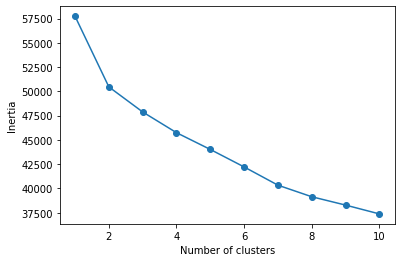

In [115]:
from sklearn.cluster import KMeans
# Compute the inertia on the data for different numbers of clusters
inertias = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(train_feature_reduced)
    inertias.append(kmeans.inertia_)

# Plot the inertia for each number of clusters
plt.plot(range(1, 11), inertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

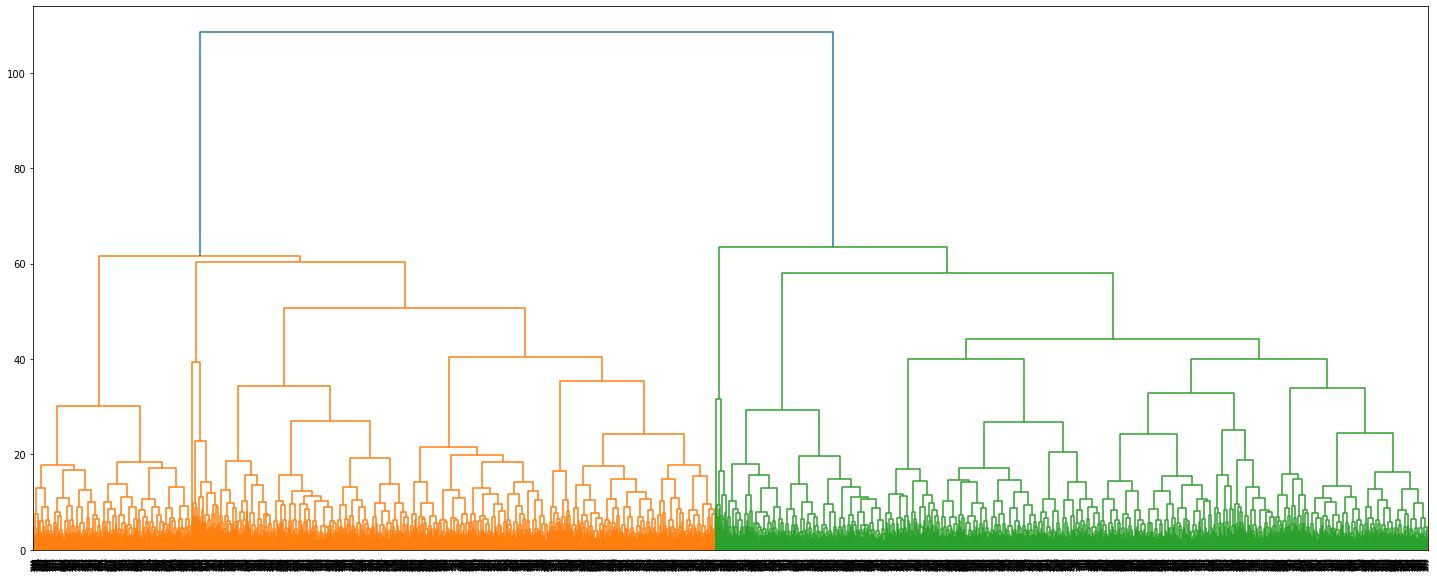

In [116]:
from scipy.cluster.hierarchy import linkage, dendrogram
# Compute the linkage matrix
Z = linkage(train_feature_reduced, method='ward')

# Plot the dendrogram
plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

From both the K means inertia plot and hierarchy cluserting dendrogram, we can see there exist 2 clusters.

Since the unsupervised learning clustering approaches dones't tell why the clusters are formed. We assume the clusters are due to the diagnosis results. We use t-sne and PCA to project the data into 2 dimensions and color code the diagnosis results. 

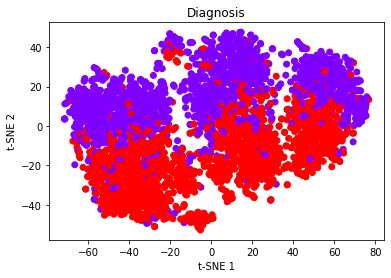

In [117]:
# Perform t-SNE to reduce the number of dimensions to 2
tsne = TSNE(n_components=2)
tsne_data = tsne.fit_transform(train_feature_reduced.drop('Diagnosis', axis=1))

# Plot the data points
plt.scatter(tsne_data[:, 0], tsne_data[:, 1], c=train_feature_reduced['Diagnosis'], cmap='rainbow')

# Add labels and title to the plot
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Diagnosis')

# Show the plot
plt.show()

T-sne transformation cannot represents the two groups by diagnosis results. 

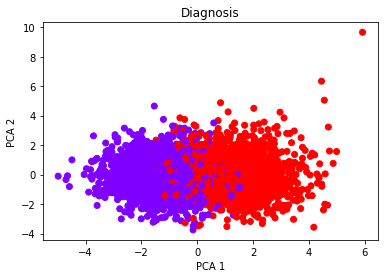

In [118]:
#PCA
from sklearn.decomposition import PCA
# Perform PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(train_feature_reduced.drop('Diagnosis', axis=1))

# Plot the data points
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=train_feature_reduced['Diagnosis'], cmap='rainbow')

# Add labels and title to the plot
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Diagnosis')

# Show the plot
plt.show()

**Conclusion**: 

It seems, PCA can better represent the two groups of diagnosis results. Another reason to try PCA, is that there are multicollinerity between the variables. We generate PCA transformed training and testing datasets for modeling purpose, and will compare the model performance with and without PCA transformation. 

In [119]:
# Perform PCA
pca = PCA()
X_train_pca = pca.fit_transform(train_feature_reduced.drop('Diagnosis', axis=1))

# Get explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Rank explained variance ratio
rank = np.argsort(-explained_variance)

# Print the ranked explained variance ratio
print("Ranked explained variance ratio:", explained_variance[rank])

Ranked explained variance ratio: [0.17038873 0.09321823 0.08905871 0.08202601 0.0775919  0.06701052
 0.06235928 0.06019321 0.05664527 0.05464414 0.04711396 0.04154832
 0.03509518 0.03148057 0.01200515 0.01126861 0.0083522 ]


In [120]:
# Update test data set for PCA
test_processed_pca = data_remove(test_set)
test_encoded_pca = pd.get_dummies(test_processed_pca, columns = categories)
test_feature_reduced = test_encoded_pca.drop(removed_feature, axis=1)
X_test_pca = pca.transform(test_feature_reduced.drop('Diagnosis', axis=1))

##Classification Models

Use accuracy, precision, recall rates, and confusion metric to evaluate model performance. 

In [121]:
def clf_metrics(y_test, y_pred, test_name):
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("--- Metrics for", test_name, '---')
    print('Accuracy:', skm.accuracy_score(y_test, y_pred))
    # Compute precision and recall
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)

    print("Precision:", precision)
    print("Recall:", recall)

    # Plot confusion matrix using seaborn heatmap
    sns.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

First, lets build binary classification models with PCA transformation. 

Process test dataset:

In [122]:
test_processed = data_remove(test_set)
test_encoded = pd.get_dummies(test_processed, columns = categories)
X_test = test_encoded.drop('Diagnosis', axis= 1).drop(removed_feature, axis=1)
y_test = test_encoded['Diagnosis']
X_train = train_encoded.drop('Diagnosis', axis= 1).drop(removed_feature, axis=1)
y_train = train_encoded['Diagnosis']

**Light GBM model**

In [123]:
def GBM(X_train,y_train, X_test, y_test):
    # Define the LightGBM model
    model = lgb.LGBMClassifier()

    # Train the model
    model.fit(X_train, y_train)

    # Get the predicted probabilities for the test set
    y_probs = model.predict_proba(X_test)[:, 1]

    # Create an array of threshold values
    thresholds = np.arange(0, 1.01, 0.01)

    # Initialize an empty list to store the AUC scores
    scores = []

    # Iterate over the threshold values
    for t in thresholds:
        # Convert the predicted probabilities to class labels using the current threshold
        y_pred = (y_probs > t).astype(int)
        # Calculate the AUC score for the current threshold
        score = roc_auc_score(y_test, y_pred)
        # Append the score to the list
        scores.append(score)

    # Find the threshold that corresponds to the highest AUC score
    best_threshold = thresholds[np.argmax(scores)]
    #print(f'The optimal threshold is {best_threshold:.2f}')

    train_data = lgb.Dataset(X_train, label=y_train)
    params = {'objective': 'binary', 'metric': 'binary_logloss'}
    LGB_model = lgb.train(params, train_data)
    # Predict on the test data
    LGB_test_predictions = LGB_model.predict(X_test)

    # Convert the predicted probabilities to binary labels
    LGB_test_predictions = (LGB_test_predictions > best_threshold).astype(int)

    clf_metrics(y_test, LGB_test_predictions, 'Light GBM')
    lgb.plot_importance(LGB_model)
    return LGB_test_predictions

--- Metrics for Light GBM ---
Accuracy: 0.9433333333333334
Precision: 0.9401595744680851
Recall: 0.9464524765729585


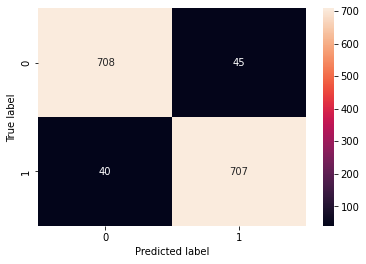

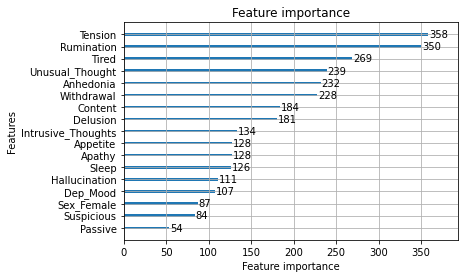

In [124]:
LGB_test_predictions = GBM(X_train,y_train, X_test, y_test)

**Logistic Regression Model**

In [125]:
def logisticR(X_train,y_train, X_test, y_test):
    #Logistc regression training 
    LGmodel = LogisticRegression(penalty='elasticnet', max_iter= 1000, solver= 'saga', l1_ratio=1)
    LGmodel.fit(X_train, y_train)
    LG_test_predict = LGmodel.predict(X_test)
    clf_metrics(y_test, LG_test_predict, 'Logistic Regression')

--- Metrics for Logistic Regression ---
Accuracy: 0.9233333333333333
Precision: 0.927027027027027
Recall: 0.9183400267737617


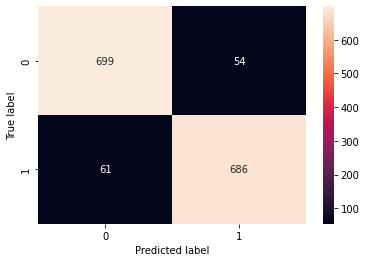

In [126]:
logisticR(X_train,y_train, X_test, y_test)

**SVM**

--- Metrics for SVM ---
Accuracy: 0.92
Precision: 0.9242219215155616
Recall: 0.9143239625167336


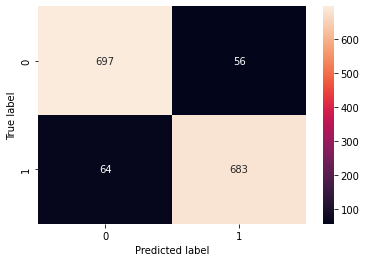

In [127]:
from sklearn import svm
svm_model = svm.SVC(kernel='linear')
svm_model = svm_model.fit(X_train, y_train)
svm_test_predictions = svm_model.predict(X_test)
clf_metrics(y_test, svm_test_predictions, 'SVM')

**Random Forrest**

--- Metrics for Random Forest ---
Accuracy: 0.9406666666666667
Precision: 0.9398395721925134
Recall: 0.9410977242302544


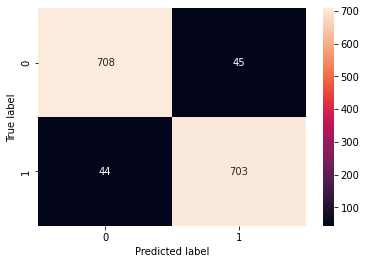

In [128]:
from sklearn.ensemble import RandomForestClassifier
# Create a random forest classifier
clf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Predict the labels for the test set
rf_test_predictions = clf.predict(X_test)

clf_metrics(y_test, rf_test_predictions, 'Random Forest')

Without PCA transformation, the best classficaition model is Light GBM model with the best accuracy, recall and precision rates, followed by Random Forrest, logistic regression and SVM. 

Next, we will compare the Light GBM results with PCA transformation. 

--- Metrics for Light GBM ---
Accuracy: 0.94
Precision: 0.9445196211096076
Recall: 0.9344042838018741


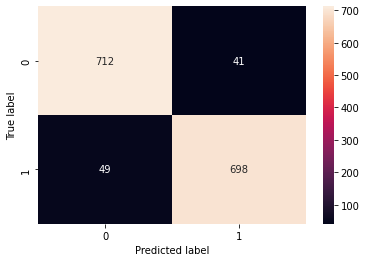

array([0, 0, 0, ..., 1, 1, 1])

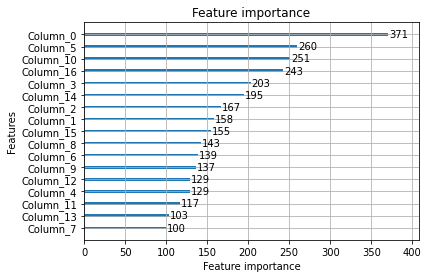

In [129]:
GBM(X_train_pca,y_train, X_test_pca, y_test)

**Conclusion**: 

It seems PCA tranformation doesn't improve the performance of the Light GBM model. **The best model** is the Light GBM model with selected features without PCA transformation, compared with Random Forrest, logistic regression and SVM. 

##Cross Validation

By using cross-validation, we can get a more accurate estimate of the light GBM model's performance and reduce the risk of overfitting.

In [130]:
def GBM_best_threshold(X_train,y_train, X_test, y_test):
    # Define the LightGBM model
    model = lgb.LGBMClassifier()

    # Train the model
    model.fit(X_train, y_train)

    # Get the predicted probabilities for the test set
    y_probs = model.predict_proba(X_test)[:, 1]

    # Create an array of threshold values
    thresholds = np.arange(0, 1.01, 0.01)

    # Initialize an empty list to store the AUC scores
    scores = []

    # Iterate over the threshold values
    for t in thresholds:
        # Convert the predicted probabilities to class labels using the current threshold
        y_pred = (y_probs > t).astype(int)
        # Calculate the AUC score for the current threshold
        score = roc_auc_score(y_test, y_pred)
        # Append the score to the list
        scores.append(score)

    # Find the threshold that corresponds to the highest AUC score
    best_threshold = thresholds[np.argmax(scores)]
    return best_threshold

In [131]:
#data processing pipeline for feature dataset X
def X_pipeline(data):
  train_processed = data_remove(data)
  train_encoded = pd.get_dummies(train_processed, columns = categories)
  X_processed = train_encoded.drop(removed_feature, axis=1)
  return X_processed

In [132]:
#k fold cross validation
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, f1_score

X_cv = train_set.drop('Diagnosis', axis = 1)
y_cv = train_set['Diagnosis']

# set k-fold cross-validation
k = 5
kf = KFold(n_splits=k)

# store performance metrics
accuracies = []
f1_scores = []

# perform k-fold cross-validation
for train_index, test_index in kf.split(X_cv):
    y_train_cv, y_test_cv = y_cv.iloc[train_index], y_cv.iloc[test_index]
    X_train_cv = X_pipeline(X_cv.iloc[train_index])
    X_test_cv = X_pipeline(X_cv.iloc[test_index])
    train_data = lgb.Dataset(X_train_cv, label=y_train_cv)
    params = {'objective': 'binary', 'metric': 'binary_logloss'}
    LGB_model = lgb.train(params, train_data)
    y_pred_cv = LGB_model.predict(X_test_cv)
    best_threshold = GBM_best_threshold(X_train_cv,y_train_cv, X_test_cv, y_test_cv)
    LGB_test_predictions_cv = (y_pred_cv > best_threshold).astype(int)
    acc = accuracy_score(y_test_cv, LGB_test_predictions_cv)
    f1 = f1_score(y_test_cv, LGB_test_predictions_cv)
    accuracies.append(acc)
    f1_scores.append(f1)

# print k-fold cross-validation performance metrics
print(f"{k} fold cross validation results: ")
print("Accuracies: ", np.around(accuracies,2))
print("F1-Scores: ", np.around(f1_scores,2))
print("Mean Accuracy: ", np.around(np.mean(accuracies),2))
print("STD Accuracy: ", np.around(np.std(accuracies),2))
print("Mean F1-Score: ", np.around(np.mean(f1_scores),2))
print("STD F1-Score: ", np.around(np.std(f1_scores),2))

5 fold cross validation results: 
Accuracies:  [0.94 0.92 0.93 0.95 0.92]
F1-Scores:  [0.94 0.92 0.93 0.95 0.92]
Mean Accuracy:  0.93
STD Accuracy:  0.01
Mean F1-Score:  0.93
STD F1-Score:  0.01


**Conclusion**: 

We performed 5 fold cross validation on the chosen light GBM model. According to the mean and STD of accuracy and F1 score, the model is not overfitting/underfitting, and has good average accuracy. 

#Bias Analysis

The light GBM model performs well with cross validation. However, the classification problem is based on human related data. Human related data can introduce bias into a classification model because it can reflect and amplify existing societal biases and stereotypes. It is important to analyze the representativeness and diversity in the model performance.  

The false negative rate (FNR) is a metric that measures the number of instances where a disease was not diagnosed but should have been, divided by the total number of instances where the disease was actually present. It is calculated as FNR = (false negatives) / (false negatives + true positives).

In disease diagnosis, FNR is an important metric because it tells us how many cases of the disease are being missed by the diagnostic test. A high FNR means that the test is not sensitive enough and is missing many cases of the disease. This can have serious consequences for patients, as they may not receive the necessary treatment in a timely manner. On the other hand, a low FNR indicates that the test is able to detect the disease effectively, which is essential for proper disease management.Therefore, the disgnosis models should aims for high recall rate and low FNR. 

In this analysis, we explore the model bias from sex and race perspectives. We use a python lib called fairlearn to facilitate our analysis.  

In [133]:
def raceNsex_fn(truelabels, predictions, test):
  sesitive = pd.DataFrame(np.stack([test.Race, test.Sex], axis = 1),
                          columns = ['Race','Sex']) 
  fmetrics = MetricFrame(metrics= fairlearn.metrics.false_negative_rate, 
                         y_true=truelabels, 
                         y_pred=predictions,
                         sensitive_features=sesitive)
  results = pd.DataFrame([fmetrics.by_group, fmetrics.by_group/fmetrics.by_group.White.Male], 
                         index= ['FNR', 'FNR Parity'])
  return results

In [134]:
raceNsex_fn(y_test, LGB_test_predictions, test_set)

Race           Asian               Black            Hispanic            \
Sex           Female      Male    Female      Male    Female      Male   
FNR         0.075472  0.034483  0.075472  0.012658  0.081633  0.047619   
FNR Parity  2.515723  1.149425  2.515723  0.421941  2.721088  1.587302   

Race           White        
Sex           Female  Male  
FNR         0.114504  0.03  
FNR Parity  3.816794  1.00

**Conclusion**:

- Females always have higher FNR than males in the same racial group. 
- White Female has the highest FNR, while Black Male has the lowest FNR. 
- Overall Black group has lower FNR in both sexes. 
- Considering that Race is not a selected feature in the Light GBM model, the race related prediction bias could be introduced by other variables or unseen factors. Future work is needed to understand the cause of such bias effect.

##Summary

In this data analysis project, exploratory data analysis was performed and several variables were found to have issues such as constant, missing, and big value ranges. After selecting the features through Chi 2 test and mutual_info_classif, PCA was applied for dimension reduction, but it did not improve the performance of the Light GBM model, which was found to be the best model among Random Forrest, logistic regression and SVM. 5-fold cross validation was performed on the chosen model and the results showed that it is not overfitting or underfitting and has good average accuracy. However, a race related prediction bias was found with higher False Negative Rates for females and higher rates for white females and lower rates for black males. Further investigation is needed to understand the cause of this bias.